<a href="https://colab.research.google.com/github/gaudhami4/Counting-rice-grains-and-classification/blob/main/counting_rice_grains_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

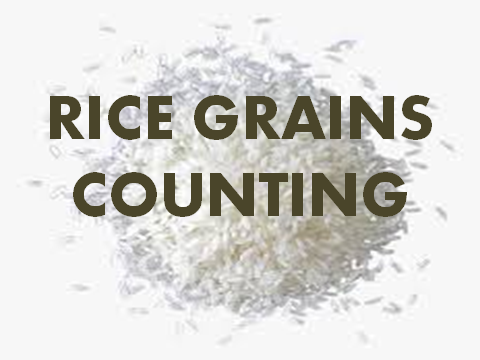

# **System Architecture Daigram**
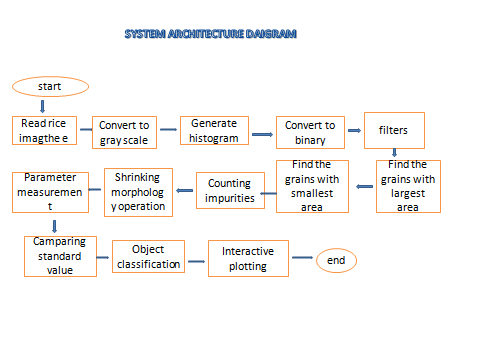

**FINAL SUBMISSION FILE IN CSV FORMAT**

# **Introduction:**
Image processing can be used to analyze many different properties of an image,
including the distribution and change in colors in the image, the number, size, position,
orientation, and shape of objects in the image, and even - when combined with machine
learning techniques for object recognition - the type of objects in the image.
Objective:
Using image processing techniques and edge detect

# **Objective:**
Using image processing techniques and edge detection algorithms to count the
number of grains and to classify the rice grains based on broken and full grains.
Proposed Architecture:

★ Converting images from RGB to Grayscale

★ Morphological Methods
   - Erosion
   - Dilation

★ Edge Detection

# **Morphological Methods:**
Morphological operations apply a structuring element to an input image, creating
an output image of the same size.

- Erosion:
Erosion shrinks the image pixels, or erosion removes pixels on object
boundaries.

- Dilation:
Dilation expands the image pixels, or it adds pixels to object boundaries.

 Edge Detection:
Edge Detection is a method of segmenting an image into regions of discontinuity.

- Canny Edge detection:

 Canny Edge Detection is used to detect the edges in an image. It accepts a
grayscale image as input and it uses a multi-stage algorithm

**Implementation:**

Language: Python

Libraries: OpenCV, NumPy, Matplotlib.

➔ The initial stage of image processing is pre-processing the given images.

➔ Converting the RGB image to Grayscale. Conversion to grayscale was done
because it simplifies the algorithm and reduces computational requirements.

➔ A kernel of matrix size 5 is convolved with the image

➔ With the help of erosion, small white noises are removed and detached two
connected rice grains.

➔ Erosion is followed by dilation.

➔ It increases the white region in the image or the size of the foreground object(rice
grain) increases. Erosion removes white noises, but it also shrinks our object.
Hence, the images were dilated.

➔ Contours are used for joining all the continuous points (along the boundary),
having the same intensity. The contours are a useful tool for shape analysis and
object detection and recognition.

➔ The Canny Edge Detection algorithm was used to detect the edges that gave the
total quantity of the grains from the image.

➔ The ratio of each grain was calculated to analyze the quality in terms of slender,
medium, bold, and round.

➔ For every full grain image given, the ratio of each grain was calculated and an
average aspect ratio of all the grains was calculated. This process was repeated
for all the images given.

➔ The average ratio of all full grains and broken grains from their respective images
were taken to define the condition that helped in classifying the rice grains.

➔ With the help of the matplotlib library, the images were plotted for better
understanding and to give a visualization of the pre-processing techniques that
were applied.
Future enhancement:
A different and more precise approach can be made, by initially pre-processing
the images and training them using a neural network followed by segmentation and
classification.


# **CODE BEGINS**

In [9]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=df2ed474197bfcf3ce289f7f781d47e2845c05d5b30efb

# **IMPORT NECESSARY LIBRARIES**

In [23]:
import plotly.graph_objects as go
from plotly import subplots
import plotly.express as px
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from io import BytesIO
import base64
from pathlib import Path
from PIL import Image

# **CLASSIFICATION OF RICE PARTICLES**

In [5]:
def get_classification(ratio):
      ratio =round(ratio,1)
      toret=""
      if(ratio>=3 and ratio<3.5):
          toret="full"
      elif(ratio>=2.1 and ratio<3):
          toret="broken"
    
      else:
          toret="Dust"
      return toret

# **INITIALISING THE VALUES**

**IMAGE1**

In [6]:
classification = {"full":0, "broken":0,  "Dust":0}
avg =  {"full":0, "broken":0,  "Dust":0}
img = cv2.imread("/content/image_1.jpg",0)#load in greyscale mode

#convert into binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary

#averaging filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

#erosion
erosion = cv2.erode(dst,kernel2,iterations = 1)

#dilation 
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

#edge detection
edges = cv2.Canny(dilation,100,200)

### Size detection
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("No. of rice grains=",len(contours))
total_ar=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    #print(round(aspect_ratio,2),get_classification(aspect_ratio))
    classification[get_classification(aspect_ratio)] += 1
    if get_classification(aspect_ratio) != "Dust":
        total_ar+=aspect_ratio
    if get_classification(aspect_ratio) != "Dust":
        avg[get_classification(aspect_ratio)] += aspect_ratio
avg_ar=total_ar/len(contours)
if classification['full']!=0:
    avg['full'] = avg['full']/classification['full']
if classification['broken']!=0:
    avg['broken'] = avg['broken']/classification['broken']


No. of rice grains= 423


**HISTOGRAM**

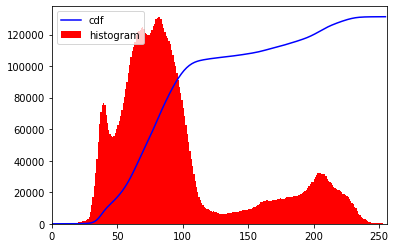

In [46]:
hist,bins=np.histogram(img.flatten(),256,[0,256])
cdf=hist.cumsum()
cdf_normalised=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalised,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.show()

# INTERACTIVE PLOTTING BAR CHART WITH TOTAL NUMBER OF 
#DUST
# FULL,
# BROKEN
# GRAINS

In [7]:
def get_plot1(classification = classification, avg = avg, avg_ar = avg_ar):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"bar"}]], shared_xaxes=True)
    print(list(classification.keys()))
    print(list(classification.values()))
    print(len(contours))
    plot1 = go.Bar(x=list(classification.keys()), y=list(classification.values()), name="Particles")
    plot2 = go.Bar(x=list(avg.keys()), y=list(avg.values()), name="Avg. Aspect Ratio")
    fig.add_trace(plot1,1,1)
    fig.add_trace(plot2,1,1)
    fig.add_shape(
        type="line",
        x0=0,
        y0=round(avg_ar,2),
        x1=5,
        y1=round(avg_ar,2),
        line=dict(
            color="LightSeaGreen",
            width=4,
            dash="dashdot",
        ),
    )
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 5, "r": 5, "t": 30, "b": 5},
        title = "Average Aspect Ratio Vs Classification",
        template = "plotly_dark"
    )
    return fig

**INTERACTIVE PLOT**

In [10]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

st.button('get_plot1')
get_plot1()

  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-01-31 05:04:54.935 
  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]


['full', 'broken', 'Dust']
[8, 72, 343]
423


**INTERACTIVE PLOTTING PIE CHART WITH TOTAL NUMBER OF RICE=FULL+BROKEN,TOTAL GRAINS,DUST**


In [13]:
def get_plot2(classification = classification):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"pie"}]])
    rice = sum(list(classification.values())) - classification['Dust']
    dust = classification['Dust']
    total=len(contours)
    values = [rice, dust,total]
    labels = ["Rice", "Dust",'Total_Grains']
    plot1 = go.Pie(labels=labels, values=values, hole=.3)
    fig.add_trace(plot1,1,1)
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 65, "r": 5, "t": 60, "b": 50},
        title = "Quality Analysis",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot2')
get_plot2()


**IMAGE2**

In [ ]:
classification = {"full":0, "broken":0,  "Dust":0}
avg =  {"full":0, "broken":0,  "Dust":0}
img = cv2.imread("/content/image_2.jpg",0)#load in greyscale mode

#convert into binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary

#averaging filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

#erosion
erosion = cv2.erode(dst,kernel2,iterations = 1)

#dilation 
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

#edge detection
edges = cv2.Canny(dilation,100,200)

### Size detection
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("No. of rice grains=",len(contours))
total_ar=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    #print(round(aspect_ratio,2),get_classification(aspect_ratio))
    classification[get_classification(aspect_ratio)] += 1
    if get_classification(aspect_ratio) != "Dust":
        total_ar+=aspect_ratio
    if get_classification(aspect_ratio) != "Dust":
        avg[get_classification(aspect_ratio)] += aspect_ratio
avg_ar=total_ar/len(contours)
if classification['full']!=0:
    avg['full'] = avg['full']/classification['full']
if classification['broken']!=0:
    avg['broken'] = avg['broken']/classification['broken']

In [15]:
def get_plot1(classification = classification, avg = avg, avg_ar = avg_ar):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"bar"}]], shared_xaxes=True)
    print(list(classification.keys()))
    print(list(classification.values()))
    print(len(contours))
    plot1 = go.Bar(x=list(classification.keys()), y=list(classification.values()), name="Particles")
    plot2 = go.Bar(x=list(avg.keys()), y=list(avg.values()), name="Avg. Aspect Ratio")
    fig.add_trace(plot1,1,1)
    fig.add_trace(plot2,1,1)
    fig.add_shape(
        type="line",
        x0=0,
        y0=round(avg_ar,2),
        x1=5,
        y1=round(avg_ar,2),
        line=dict(
            color="LightSeaGreen",
            width=4,
            dash="dashdot",
        ),
    )
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 5, "r": 5, "t": 30, "b": 5},
        title = "Average Aspect Ratio Vs Classification",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot1')
get_plot1()

['full', 'broken', 'Dust']
[4, 40, 363]
407


In [16]:
def get_plot2(classification = classification):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"pie"}]])
    rice = sum(list(classification.values())) - classification['Dust']
    dust = classification['Dust']
    total=len(contours)
    values = [rice, dust,total]
    labels = ["Rice", "Dust",'total']
    plot1 = go.Pie(labels=labels, values=values, hole=.3)
    fig.add_trace(plot1,1,1)
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 65, "r": 5, "t": 60, "b": 50},
        title = "Quality Analysis",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot2')
get_plot2()


**IMAGE3**

In [31]:
classification = {"full":0, "broken":0,  "Dust":0}
avg =  {"full":0, "broken":0,  "Dust":0}
img = cv2.imread("/content/image_3.jpg",0)#load in greyscale mode

#convert into binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary

#averaging filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

#erosion
erosion = cv2.erode(dst,kernel2,iterations = 1)

#dilation 
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

#edge detection
edges = cv2.Canny(dilation,100,200)

### Size detection
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("No. of rice grains=",len(contours))
total_ar=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    #print(round(aspect_ratio,2),get_classification(aspect_ratio))
    classification[get_classification(aspect_ratio)] += 1
    if get_classification(aspect_ratio) != "Dust":
        total_ar+=aspect_ratio
    if get_classification(aspect_ratio) != "Dust":
        avg[get_classification(aspect_ratio)] += aspect_ratio
avg_ar=total_ar/len(contours)
if classification['full']!=0:
    avg['full'] = avg['full']/classification['full']
if classification['broken']!=0:
    avg['broken'] = avg['broken']/classification['broken']

No. of rice grains= 477


In [33]:
def get_plot1(classification = classification, avg = avg, avg_ar = avg_ar):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"bar"}]], shared_xaxes=True)
    print(list(classification.keys()))
    print(list(classification.values()))
    print(len(contours))
    plot1 = go.Bar(x=list(classification.keys()), y=list(classification.values()), name="Particles")
    plot2 = go.Bar(x=list(avg.keys()), y=list(avg.values()), name="Avg. Aspect Ratio")
    fig.add_trace(plot1,1,1)
    fig.add_trace(plot2,1,1)
    fig.add_shape(
        type="line",
        x0=0,
        y0=round(avg_ar,2),
        x1=5,
        y1=round(avg_ar,2),
        line=dict(
            color="LightSeaGreen",
            width=4,
            dash="dashdot",
        ),
    )
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 5, "r": 5, "t": 30, "b": 5},
        title = "Average Aspect Ratio Vs Classification",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot1')
get_plot1()


['full', 'broken', 'Dust']
[4, 61, 412]
477


In [34]:
def get_plot2(classification = classification):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"pie"}]])
    rice = sum(list(classification.values())) - classification['Dust']
    dust = classification['Dust']
    total=len(contours)
    values = [rice, dust,total]
    labels = ["Rice", "Dust",'total']
    plot1 = go.Pie(labels=labels, values=values, hole=.3)
    fig.add_trace(plot1,1,1)
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 65, "r": 5, "t": 60, "b": 50},
        title = "Quality Analysis",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot2')
get_plot2()

**IMAGE4**

In [35]:
classification = {"full":0, "broken":0,  "Dust":0}
avg =  {"full":0, "broken":0,  "Dust":0}
img = cv2.imread("/content/image_4.jpg",0)#load in greyscale mode

#convert into binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary

#averaging filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

#erosion
erosion = cv2.erode(dst,kernel2,iterations = 1)

#dilation 
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

#edge detection
edges = cv2.Canny(dilation,100,200)

### Size detection
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("No. of rice grains=",len(contours))
total_ar=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    #print(round(aspect_ratio,2),get_classification(aspect_ratio))
    classification[get_classification(aspect_ratio)] += 1
    if get_classification(aspect_ratio) != "Dust":
        total_ar+=aspect_ratio
    if get_classification(aspect_ratio) != "Dust":
        avg[get_classification(aspect_ratio)] += aspect_ratio
avg_ar=total_ar/len(contours)
if classification['full']!=0:
    avg['full'] = avg['full']/classification['full']
if classification['broken']!=0:
    avg['broken'] = avg['broken']/classification['broken']

No. of rice grains= 501


In [36]:
def get_plot1(classification = classification, avg = avg, avg_ar = avg_ar):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"bar"}]], shared_xaxes=True)
    print(list(classification.keys()))
    print(list(classification.values()))
    print(len(contours))
    plot1 = go.Bar(x=list(classification.keys()), y=list(classification.values()), name="Particles")
    plot2 = go.Bar(x=list(avg.keys()), y=list(avg.values()), name="Avg. Aspect Ratio")
    fig.add_trace(plot1,1,1)
    fig.add_trace(plot2,1,1)
    fig.add_shape(
        type="line",
        x0=0,
        y0=round(avg_ar,2),
        x1=5,
        y1=round(avg_ar,2),
        line=dict(
            color="LightSeaGreen",
            width=4,
            dash="dashdot",
        ),
    )
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 5, "r": 5, "t": 30, "b": 5},
        title = "Average Aspect Ratio Vs Classification",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot1')
get_plot1()


['full', 'broken', 'Dust']
[4, 69, 428]
501


In [37]:
def get_plot2(classification = classification):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"pie"}]])
    rice = sum(list(classification.values())) - classification['Dust']
    dust = classification['Dust']
    total=len(contours)
    values = [rice, dust,total]
    labels = ["Rice", "Dust",'total']
    plot1 = go.Pie(labels=labels, values=values, hole=.3)
    fig.add_trace(plot1,1,1)
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 65, "r": 5, "t": 60, "b": 50},
        title = "Quality Analysis",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot2')
get_plot2()

**IMAGE5**

In [38]:
classification = {"full":0, "broken":0,  "Dust":0}
avg =  {"full":0, "broken":0,  "Dust":0}
img = cv2.imread("/content/image_5.jpg",0)#load in greyscale mode

#convert into binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary

#averaging filter
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

#erosion
erosion = cv2.erode(dst,kernel2,iterations = 1)

#dilation 
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

#edge detection
edges = cv2.Canny(dilation,100,200)

### Size detection
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("No. of rice grains=",len(contours))
total_ar=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    #print(round(aspect_ratio,2),get_classification(aspect_ratio))
    classification[get_classification(aspect_ratio)] += 1
    if get_classification(aspect_ratio) != "Dust":
        total_ar+=aspect_ratio
    if get_classification(aspect_ratio) != "Dust":
        avg[get_classification(aspect_ratio)] += aspect_ratio
avg_ar=total_ar/len(contours)
if classification['full']!=0:
    avg['full'] = avg['full']/classification['full']
if classification['broken']!=0:
    avg['broken'] = avg['broken']/classification['broken']

No. of rice grains= 442


In [39]:
def get_plot1(classification = classification, avg = avg, avg_ar = avg_ar):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"bar"}]], shared_xaxes=True)
    print(list(classification.keys()))
    print(list(classification.values()))
    print(len(contours))
    plot1 = go.Bar(x=list(classification.keys()), y=list(classification.values()), name="Particles")
    plot2 = go.Bar(x=list(avg.keys()), y=list(avg.values()), name="Avg. Aspect Ratio")
    fig.add_trace(plot1,1,1)
    fig.add_trace(plot2,1,1)
    fig.add_shape(
        type="line",
        x0=0,
        y0=round(avg_ar,2),
        x1=5,
        y1=round(avg_ar,2),
        line=dict(
            color="LightSeaGreen",
            width=4,
            dash="dashdot",
        ),
    )
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 5, "r": 5, "t": 30, "b": 5},
        title = "Average Aspect Ratio Vs Classification",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot1')
get_plot1()


['full', 'broken', 'Dust']
[6, 49, 387]
442


In [40]:
def get_plot2(classification = classification):
    fig = subplots.make_subplots(rows=1,cols=1,specs=[[{"type":"pie"}]])
    rice = sum(list(classification.values())) - classification['Dust']
    dust = classification['Dust']
    total=len(contours)
    values = [rice, dust,total]
    labels = ["Rice", "Dust",'total']
    plot1 = go.Pie(labels=labels, values=values, hole=.3)
    fig.add_trace(plot1,1,1)
    fig.update_layout(
        width = 600,
        height = 350,
        margin = {"l": 65, "r": 5, "t": 60, "b": 50},
        title = "Quality Analysis",
        template = "plotly_dark"
    )
    return fig
st.button('get_plot2')
get_plot2()

In [41]:
Image_name=['/content/image_1.jpg','/content/image_2.jpg','/content/image_3.jpg','/content/image_4.jpg','/content/image_5.jpg']
Total_rice=[423,407,477,501,442]
Broken_rice=[72,40,61,69,49]

# **SUBMISSION.CSV FILE**





In [42]:
#image_link=list(Path(r'C:\Users\intel\Desktop\monu\data\test').glob(r'**/*.jpg'))
#
df=pd.DataFrame()
#df['link']=np.array('image_link',dtype=np.str_)

df['Image']=Image_name
df['Total_rice']=Total_rice
df['Broken_rice']=Broken_rice

In [44]:
df

,Image,Total_rice,Broken_rice
0,/content/image_1.jpg,423,72
1,/content/image_2.jpg,407,40
2,/content/image_3.jpg,477,61
3,/content/image_4.jpg,501,69
4,/content/image_5.jpg,442,49


In [45]:
df.to_csv("submission_file.csv")

END
# THANK YOU FOR THIS WONDERFUL PROJECT 